In [3]:
# Importing relevant libraries

import requests
import requests.auth
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
# Reading complete dataset into a pandas dataframe

df = pd.read_csv('reddit_class_data.csv')

In [6]:
# Resetting the index

df.set_index('Unnamed: 0', inplace=True)
df.index.name = None

In [7]:
# Taking a look at the dataframe
# Entries with a value of 0 are intentionally represented by NaN to aid EDA

df.head()

,business,LooneyTunesLogic,UTAustin,grandorder,turntables,Maine,Floki,Gaming_Headsets,belowdeck,bassfishing,...,AutismTranslated,WomenWithWatches,QMEE,ColoradoSwingers,mitralvalveprolapse,teams,GeorgiaCampAndHike,KazuhaMains,TRGMakesMusic,lucky
OliveInvestor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regarding_your_cat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mr_kazemiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
damn_montana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Philinizavr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# All data is of type float64

df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [9]:
df.shape

(6480, 25609)

In [10]:
# Checking if there are any empty columns

df.isna().sum()[df.isna().sum() == df.shape[0]]

Series([], dtype: int64)

In [11]:
# Examining Target class balance

df.Target.value_counts(normalize=True)

1.0    0.519753
0.0    0.480247
Name: Target, dtype: float64

In [12]:
# Replacing NaN values with 0

df.replace(np.nan, 0, inplace=True)

In [13]:
df.head()

,business,LooneyTunesLogic,UTAustin,grandorder,turntables,Maine,Floki,Gaming_Headsets,belowdeck,bassfishing,...,AutismTranslated,WomenWithWatches,QMEE,ColoradoSwingers,mitralvalveprolapse,teams,GeorgiaCampAndHike,KazuhaMains,TRGMakesMusic,lucky
OliveInvestor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
regarding_your_cat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mr_kazemiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
damn_montana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Philinizavr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

### Removing Outliers

In [14]:
# Doing this to reduce over-fitting

# Consider using line plots to visualise number of subreddits interacted and sum of scores for each user
# Visually identify outlier users

In [15]:
# What is the lowest number of subreddits a user has interacted with
# What is the highest
# What is the mean

# What is the lowest total score a user has received
# What is the highest
# What is the mean

In [16]:
# Creating copy of data and replace 0s with NaNs for EDA 

df_na = df.replace(0, np.nan).copy()
df_na.Target.replace(np.nan, 0, inplace=True)

In [17]:
df_na.Target.value_counts(normalize=True)

1.0    0.519753
0.0    0.480247
Name: Target, dtype: float64

In [18]:
# Checking for outliers

# Removing certain users who have interacted with very many or very few subreddits to ensure that 
# the only factor considered when predicting the class is which subreddits they have interacted with and the 
# associated scores

Want the data to be representative of the general population
Don't want models to be skewed by user with too few/many interacted subreddits or scores that are too low/high
Trying to reduce overfitting

Consider testing models on dataset with outliers remaining

In [19]:
# Summing values across columns/subreddits for each row/user

df_na.drop(columns=['Target']).sum(axis=1)

OliveInvestor         165.321910
regarding_your_cat      3.000000
mr_kazemiro           243.995363
damn_montana           97.492131
Philinizavr           276.674288
                         ...    
UKentDoThat           184.552924
Noerknhar             118.671584
Vyzantinist           196.109608
manucaradetatu         31.380831
DemanoRock             88.922985
Length: 6480, dtype: float64

In [20]:
# Briefly examing distribution

df_na.drop(columns=['Target']).sum(axis=1).describe()

count    6480.000000
mean      129.712852
std       110.261241
min     -1548.500000
25%        70.301098
50%       110.812870
75%       173.383648
max      4546.578448
dtype: float64

In [21]:
# Defining Inter Quartile Range, Upper and Lower bounds

IQR = df_na.drop(columns=['Target']).sum(axis=1).describe()['75%'] - df_na.drop(columns=['Target']).sum(axis=1).describe()['25%']
Upper = df_na.drop(columns=['Target']).sum(axis=1).describe()['75%'] + (1.5 * IQR)
Lower = df_na.drop(columns=['Target']).sum(axis=1).describe()['25%'] - (1.5 * IQR)

In [22]:
# Examining Inter Quartile Range, Upper and Lower bounds

IQR, Upper, Lower

(103.08255022051915, 328.0074738024151, -84.32272707966149)

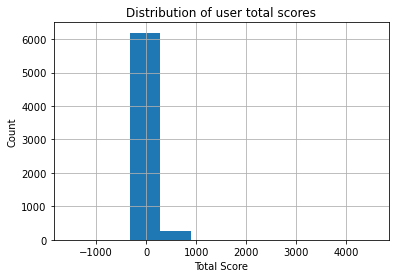

In [241]:
# Visually examining distribution with a histogram

df_na.drop(columns=['Target']).sum(axis=1).hist()

plt.xlabel("Total Score")
plt.ylabel("Count")
plt.title("Distribution of user total scores")

plt.show()

<AxesSubplot:>

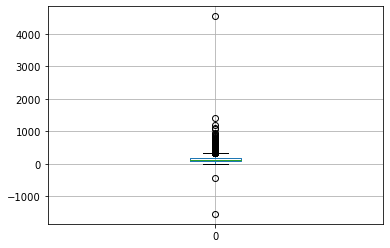

In [24]:
# Visually examining distribution with a boxplot

pd.DataFrame(df_na.drop(columns=['Target']).sum(axis=1)).boxplot()

In [25]:
# Identifying which users have total scores above or below the Upper and Lower bounds 

df_na.drop(columns=['Target']).sum(axis=1)[~(df_na.drop(columns=['Target']).sum(axis=1) >= Lower) 
                                           | ~(df_na.drop(columns=['Target']).sum(axis=1) <= Upper)]

colettik                513.619830
elseman                 390.062929
_cap_ing                359.378549
forevergamb             373.527494
billyMfQindamix         359.091672
                           ...    
Disastrous_Regular17    373.627086
thecookingofjoy         391.208517
not_bakchodest_of_al    634.217786
RVelts                  679.154266
c778490                 396.584229
Length: 188, dtype: float64

In [26]:
# Drop the 188 users that are outliers

In [27]:
# Defining a list of users to be dropped

drop_rows = df_na.drop(columns=['Target']).sum(axis=1)[~(df_na.drop(columns=['Target']).sum(axis=1) >= Lower) 
                                           | ~(df_na.drop(columns=['Target']).sum(axis=1) <= Upper)].index

In [28]:
# Examing the distribution of these outliers with respect to the Target classes

df_na.loc[drop_rows, :].Target.value_counts(normalize=True)

1.0    0.739362
0.0    0.260638
Name: Target, dtype: float64

In [29]:
# Approximately 74% of the .sum() outliers are from the Target = 1 class

In [30]:
df_na.drop(columns=['Target']).shape

(6480, 25608)

In [31]:
# Examining the distribution of the number of unique subreddits each user has interacted with

(25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)).describe()

count    6480.000000
mean       29.703395
std        19.169869
min         0.000000
25%        15.000000
50%        26.000000
75%        41.000000
max       138.000000
dtype: float64

In [32]:
# Defining Inter Quartile Range, Upper and Lower bounds

IQR_2 = (25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)).describe()['75%'] - (25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)).describe()['25%']
Upper_2 = (25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)).describe()['75%'] + (1.5 * IQR_2)
Lower_2 = (25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)).describe()['25%'] - (1.5 * IQR_2)

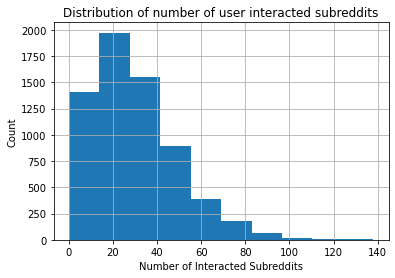

In [245]:
# Visually examining distribution with a histogram

(25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)).hist()

plt.xlabel("Number of Interacted Subreddits")
plt.ylabel("Count")
plt.title("Distribution of number of user interacted subreddits")

plt.show()

<AxesSubplot:>

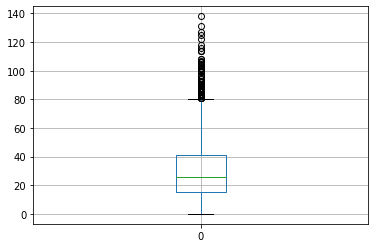

In [34]:
# Visually examining distribution with a boxplot

pd.DataFrame((25608 - df_na.drop(columns=['Target']).isna().sum(axis=1))).boxplot()

In [35]:
# Identifying which users have number of interacted subreddits above or below the Upper and Lower bounds 

(25608 - df_na.drop(columns=['Target']).isna().sum(axis=1))[~((25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)) >= Lower_2) 
                                           | ~((25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)) <= Upper_2)]


dalailame               87
EhMapleMoose           114
Anthraxious            125
Username62415           83
AmericanoWsugar         81
                      ... 
iwanttoseeart           86
charliechin            105
goobly_goo             122
fuckmeuntilicecream     89
SarahPallorMortis      107
Length: 100, dtype: int64

In [36]:
# Defining a list of users to be dropped

drop_rows_2 = (25608 - df_na.drop(columns=['Target']).isna().sum(axis=1))[~((25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)) >= Lower_2) 
                                           | ~((25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)) <= Upper_2)].index

In [37]:
# Examing the distribution of these outliers with respect to the Target classes

df_na.loc[drop_rows_2, :].Target.value_counts(normalize=True)

0.0    0.78
1.0    0.22
Name: Target, dtype: float64

In [38]:
# Approximately 78% of the .isna().sum() outliers are from the Target = 0 class

In [39]:
len(drop_rows), len(drop_rows_2)

(188, 100)

In [40]:
len(set(list(drop_rows) + list(drop_rows_2)))

288

In [41]:
# Examing the distribution of all outliers with respect to the Target classes

df_na.loc[list(set(list(drop_rows) + list(drop_rows_2))), :].Target.value_counts(normalize=True)

1.0    0.559028
0.0    0.440972
Name: Target, dtype: float64

In [42]:
# Approximately 56% of all the outliers are from the Target = 1 class

In [43]:
# Creating a copy of the dataframe and removing outliers

df_na_2 = df_na.drop(drop_rows).copy()
df_na_2.drop(drop_rows_2, inplace=True)

In [44]:
# Target class balance before dropping outliers

df_na.Target.value_counts(normalize=True)

1.0    0.519753
0.0    0.480247
Name: Target, dtype: float64

In [45]:
# Target class balance after dropping outliers

df_na_2.Target.value_counts(normalize=True)

1.0    0.517926
0.0    0.482074
Name: Target, dtype: float64

In [46]:
# The Target class distribution remains fairly similar

In [47]:
df_na_2.drop(columns=['Target']).sum(axis=1).describe()

count    6192.000000
mean      118.212641
std        65.063897
min       -23.966765
25%        68.551443
50%       107.128019
75%       165.475589
max       326.464120
dtype: float64

In [48]:
(25608 - df_na.drop(columns=['Target']).isna().sum(axis=1)).describe()

count    6480.000000
mean       29.703395
std        19.169869
min         0.000000
25%        15.000000
50%        26.000000
75%        41.000000
max       138.000000
dtype: float64

In [49]:
df_na_2.shape

(6192, 25609)

In [50]:
# Removing columns that are now empty

drop_cols = df_na_2.isna().sum()[df_na_2.isna().sum() == 6192].index
df_na_2.drop(columns=drop_cols, inplace=True)

In [51]:
# Examining sum of scores distribution across entire dataset after removing outliers

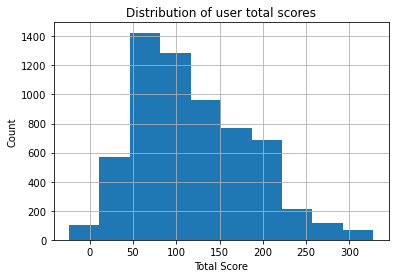

In [242]:
df_na_2.sum(axis=1).hist()

plt.xlabel("Total Score")
plt.ylabel("Count")
plt.title("Distribution of user total scores")

plt.show()

<AxesSubplot:>

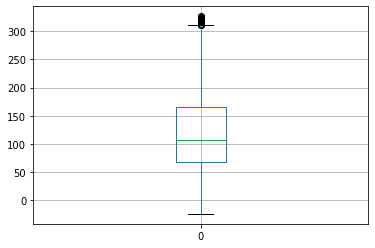

In [53]:
pd.DataFrame(df_na_2.drop(columns=['Target']).sum(axis=1)).boxplot()

In [54]:
# Examining sum of scores distribution for Target Class 1 after removing outliers

<AxesSubplot:>

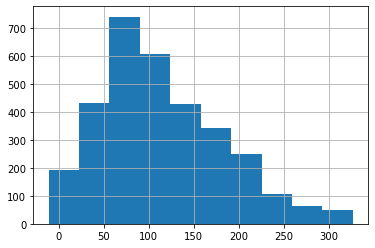

In [55]:
df_na_2[df_na_2.Target == 1].drop(columns=['Target']).sum(axis=1).hist()

<AxesSubplot:>

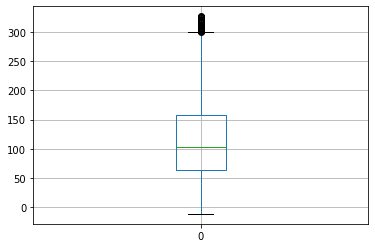

In [56]:
pd.DataFrame(df_na_2[df_na_2.Target == 1].drop(columns=['Target']).sum(axis=1)).boxplot()

In [57]:
# Examining sum of scores distribution for Target Class 0 after removing outliers

<AxesSubplot:>

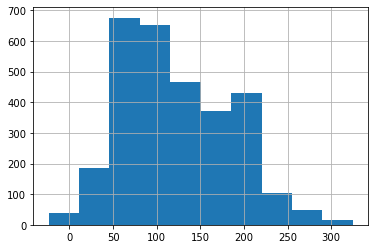

In [58]:
df_na_2[df_na_2.Target == 0].drop(columns=['Target']).sum(axis=1).hist()

<AxesSubplot:>

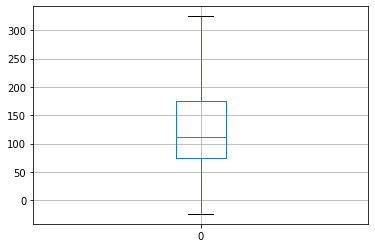

In [59]:
pd.DataFrame(df_na_2[df_na_2.Target == 0].drop(columns=['Target']).sum(axis=1)).boxplot()

In [60]:
df_na_2.drop(columns=['Target']).shape

(6192, 24530)

In [61]:
# Examining number of interacted subreddits distribution across entire dataset after removing outliers

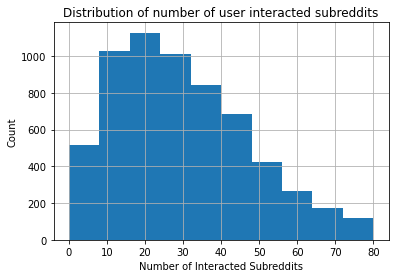

In [246]:
(24530 - df_na_2.drop(columns=['Target']).isna().sum(axis=1)).hist()

plt.xlabel("Number of Interacted Subreddits")
plt.ylabel("Count")
plt.title("Distribution of number of user interacted subreddits")

plt.show()

<AxesSubplot:>

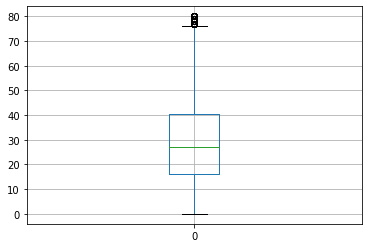

In [63]:
pd.DataFrame((24530 - df_na_2.drop(columns=['Target']).isna().sum(axis=1))).boxplot()

In [64]:
# Examining number of interacted subreddits distribution for Target Class 1 after removing outliers

<AxesSubplot:>

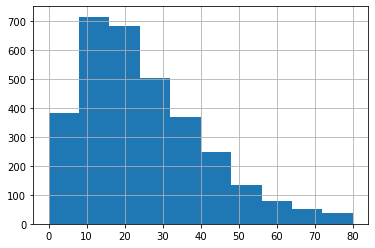

In [65]:
(24530 - df_na_2[df_na_2.Target == 1].drop(columns=['Target']).isna().sum(axis=1)).hist()

<AxesSubplot:>

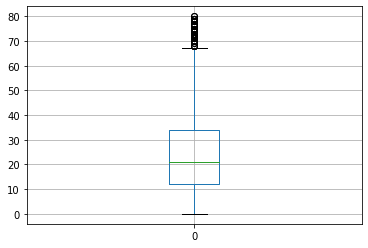

In [66]:
pd.DataFrame((24530 - df_na_2[df_na_2.Target == 1].drop(columns=['Target']).isna().sum(axis=1))).boxplot()

In [67]:
# Examining number of interacted subreddits distribution for Target Class 0 after removing outliers

<AxesSubplot:>

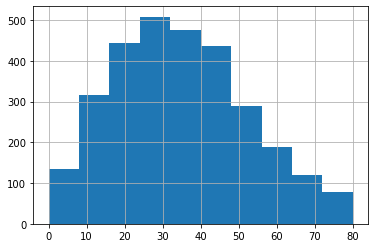

In [68]:
(24530 - df_na_2[df_na_2.Target == 0].drop(columns=['Target']).isna().sum(axis=1)).hist()

<AxesSubplot:>

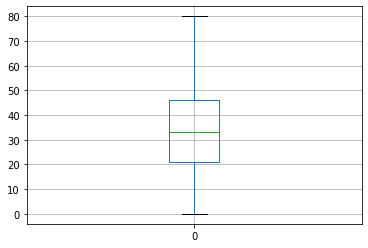

In [69]:
pd.DataFrame((24530 - df_na_2[df_na_2.Target == 0].drop(columns=['Target']).isna().sum(axis=1))).boxplot()

In [70]:
df_na_2.shape

(6192, 24531)

In [71]:
# Removing columns with only one entry (ie subreddits only one user has interacted with)

drop_cols_2 = df_na_2.isna().sum()[df_na_2.isna().sum() == 6191].index
df_na_3 = df_na_2.drop(columns=drop_cols_2).copy()

In [72]:
df_na_3.shape

(6192, 11076)

In [ ]:
# Number of columns reduced from 24531 to 11076

In [73]:
# Creating a copy of DataFrame with outliers removed and NaNs replaced with 0s

df_2 = df_na_3.replace(np.nan, 0).copy()

In [74]:
df_2.shape

(6192, 11076)

# Exploratory Data Analysis

## Interactions

In [76]:
# Most populated columns where Target == 1

df_na_3[df_na_3.Target == 1].isna().sum().sort_values().head(11)

Target                  0
AskReddit            2028
Superstonk           2397
stocks               2451
antiwork             2497
CryptoCurrency       2542
pics                 2605
funny                2662
news                 2678
interestingasfuck    2682
nextfuckinglevel     2701
dtype: int64

In [77]:
# Defining a list of the most populated columns where Target == 1

most_pop_1 = df_na_3[df_na_3.Target == 1].isna().sum().sort_values().head(11).index

In [78]:
# Values for the same columns where Target == 0 

df_na_3[df_na_3.Target == 0].isna().sum()[most_pop_1]

Target                  0
AskReddit            1203
Superstonk           2949
stocks               2949
antiwork             2451
CryptoCurrency       2863
pics                 1875
funny                1890
news                 2217
interestingasfuck    2186
nextfuckinglevel     2375
dtype: int64

In [79]:
df_na_3[df_na_3.Target == 1].shape, df_na_3[df_na_3.Target == 0].shape

((3207, 11076), (2985, 11076))

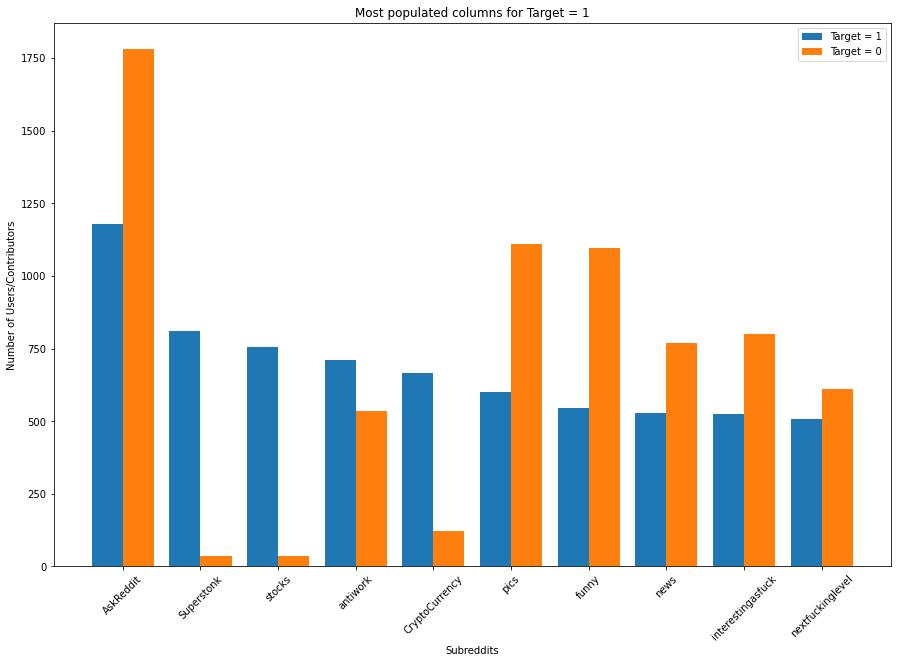

In [80]:
# Bar chart of the population of most populated columns for Target class 1 
# as compared to population of same columns for Target class 0

a = 3207 - df_na_3[df_na_3.Target == 1].isna().sum().sort_values().head(11)
b = 2985 - df_na_3[df_na_3.Target == 0].isna().sum()[most_pop_1]

plt.figure(figsize=(15,10))

x_axis = np.arange(10)

# plt.bar(a.index[1:], a.values[1:])
# plt.bar(b.index[1:], b.values[1:])

plt.bar(x_axis - 0.2, a.values[1:], 0.4, label = 'Target = 1')
plt.bar(x_axis + 0.2, b.values[1:], 0.4, label = 'Target = 0')

plt.xticks(x_axis, a.index[1:])
plt.xticks(rotation=45)

plt.xlabel("Subreddits")
plt.ylabel("Number of Users/Contributors")
plt.title("Most populated columns for Target = 1")

plt.legend()
plt.show()

<AxesSubplot:>

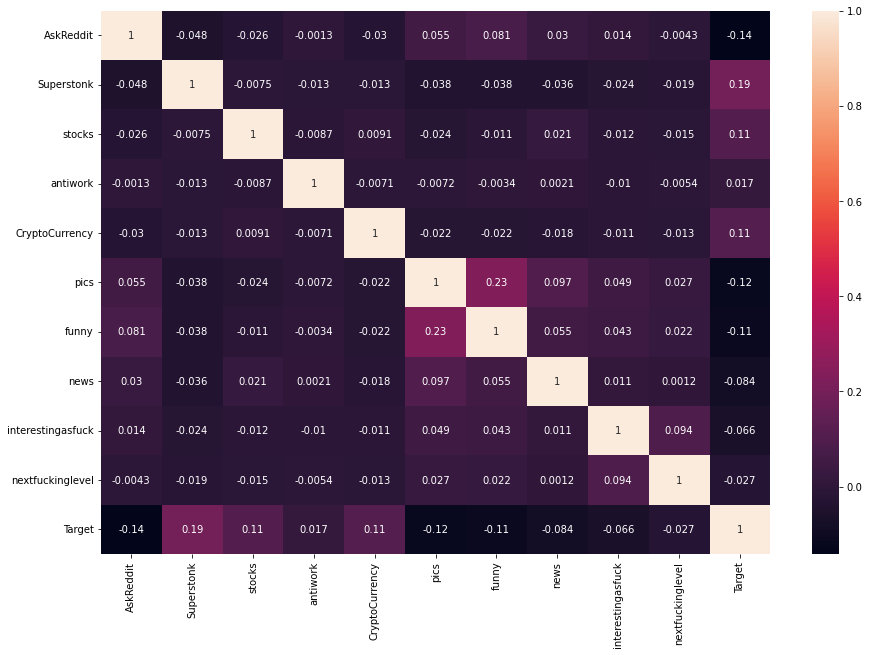

In [81]:
# Heatmap of correlations between most populated subreddits for Target Class 1 and 'Target'

plt.figure(figsize=(15,10))
sns.heatmap(df_2[list(most_pop_1[1:]) + ['Target']].corr(), annot=True)

In [82]:
# Most populated columns where Target == 0

df_na_3[df_na_3.Target == 0].isna().sum().sort_values().head(11)

Target                  0
aww                  1039
AskReddit            1203
pics                 1875
funny                1890
science              2031
food                 2168
interestingasfuck    2186
news                 2217
gaming               2226
mildlyinteresting    2291
dtype: int64

In [83]:
# Defining a list of the most populated columns where Target == 0

most_pop_0 = df_na_3[df_na_3.Target == 0].isna().sum().sort_values().head(11).index

In [84]:
# Values for the same columns where Target == 1

df_na_3[df_na_3.Target == 1].isna().sum()[most_pop_0]

Target                  0
aww                  2943
AskReddit            2028
pics                 2605
funny                2662
science              2991
food                 3115
interestingasfuck    2682
news                 2678
gaming               2745
mildlyinteresting    2914
dtype: int64

In [85]:
df_na_3[df_na_3.Target == 1].shape, df_na_3[df_na_3.Target == 0].shape

((3207, 11076), (2985, 11076))

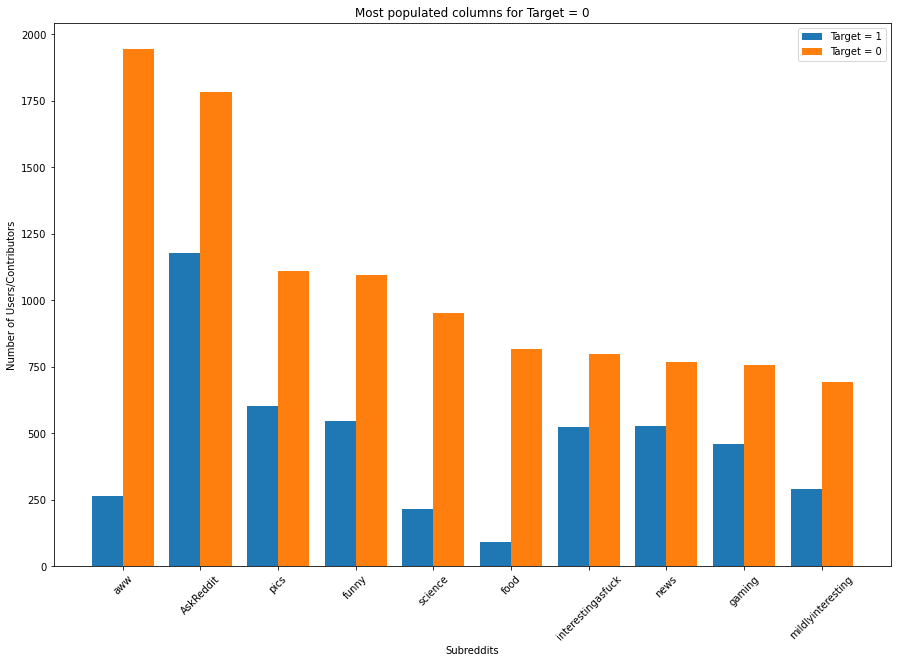

In [86]:
# Bar chart of the population of most populated columns for Target class 0 
# as compared to population of same columns for Target class 1

a = 2985 - df_na_3[df_na_3.Target == 0].isna().sum().sort_values().head(11)
b = 3207 - df_na_3[df_na_3.Target == 1].isna().sum()[most_pop_0]

plt.figure(figsize=(15,10))

x_axis = np.arange(10)

# plt.bar(a.index[1:], a.values[1:])
# plt.bar(b.index[1:], b.values[1:])

plt.bar(x_axis - 0.2, b.values[1:], 0.4, label = 'Target = 1')
plt.bar(x_axis + 0.2, a.values[1:], 0.4, label = 'Target = 0')

plt.xticks(x_axis, a.index[1:])
plt.xticks(rotation=45)

plt.xlabel("Subreddits")
plt.ylabel("Number of Users/Contributors")
plt.title("Most populated columns for Target = 0")

plt.legend()
plt.show()

<AxesSubplot:>

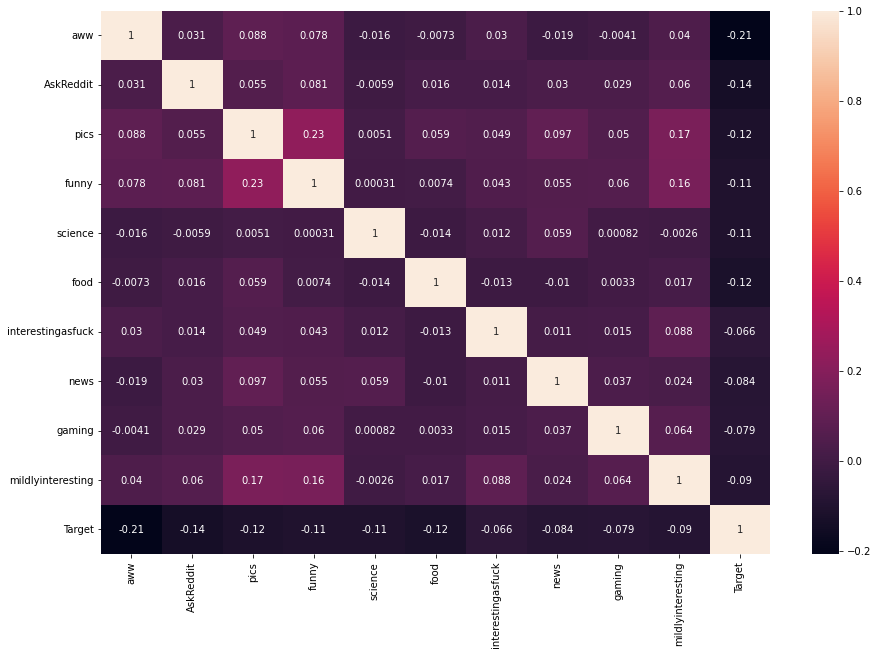

In [87]:
# Heatmap of correlations between most populated subreddits for Target Class 0 and 'Target'

plt.figure(figsize=(15,10))
sns.heatmap(df_2[list(most_pop_0[1:]) + ['Target']].corr(), annot=True)

In [88]:
######

In [233]:
# Examining the differences in the number of interactions with each subreddit between Target classes

a = (3207 - df_na_3[df_na_3.Target == 1].drop(columns=['Target']).isna().sum())
b = (2985 - df_na_3[df_na_3.Target == 0].drop(columns=['Target']).isna().sum())

(a-b).sort_values()

aww              -1682
science           -738
food              -725
AskReddit         -603
funny             -550
                  ... 
StockMarket        392
GME                444
CryptoCurrency     543
stocks             720
Superstonk         774
Length: 11075, dtype: int64

In [234]:
# Looking at the summary statistics of the differences

(a-b).describe()

count    11075.000000
mean        -1.950339
std         29.913554
min      -1682.000000
25%         -3.000000
50%         -1.000000
75%          1.000000
max        774.000000
dtype: float64

In [235]:
# Looking at the most positive and negative differences (largest absolute values)

pd.concat([(a-b).sort_values().head(), (a-b).sort_values().tail()])

aww              -1682
science           -738
food              -725
AskReddit         -603
funny             -550
StockMarket        392
GME                444
CryptoCurrency     543
stocks             720
Superstonk         774
dtype: int64

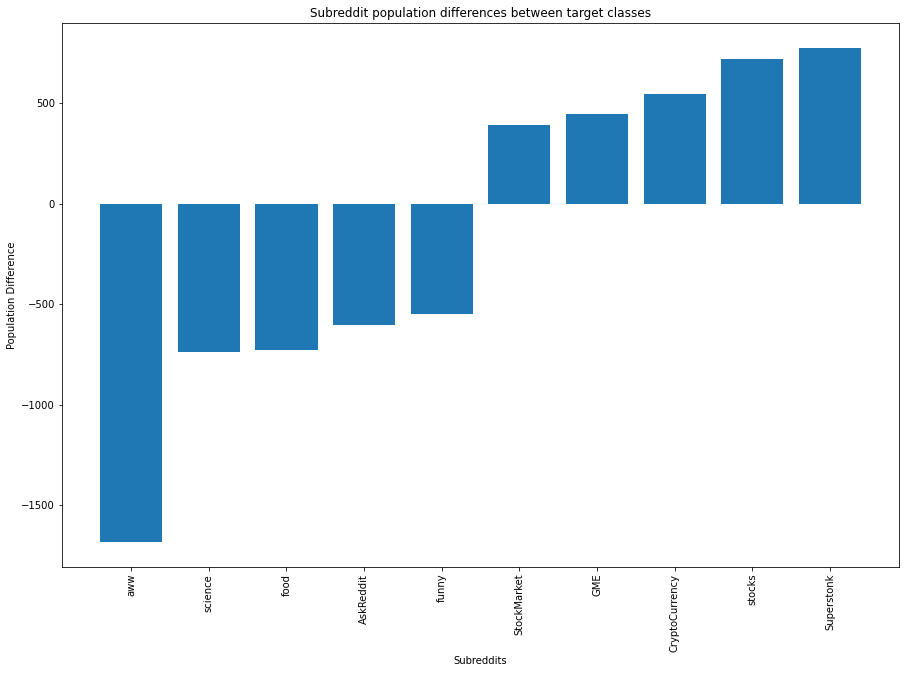

In [236]:
# Plotting a bar chat of the subreddits with the larget differences in interactions numbers between Target classes

x = pd.concat([(a-b).sort_values().head(), (a-b).sort_values().tail()])

plt.figure(figsize=(15,10))

x_axis = np.arange(len(x))

plt.bar(x.index, x.values)

plt.xticks(rotation=90)

plt.xlabel("Subreddits")
plt.ylabel("Population Difference")
plt.title("Subreddit population differences between target classes")

plt.show()

<AxesSubplot:>

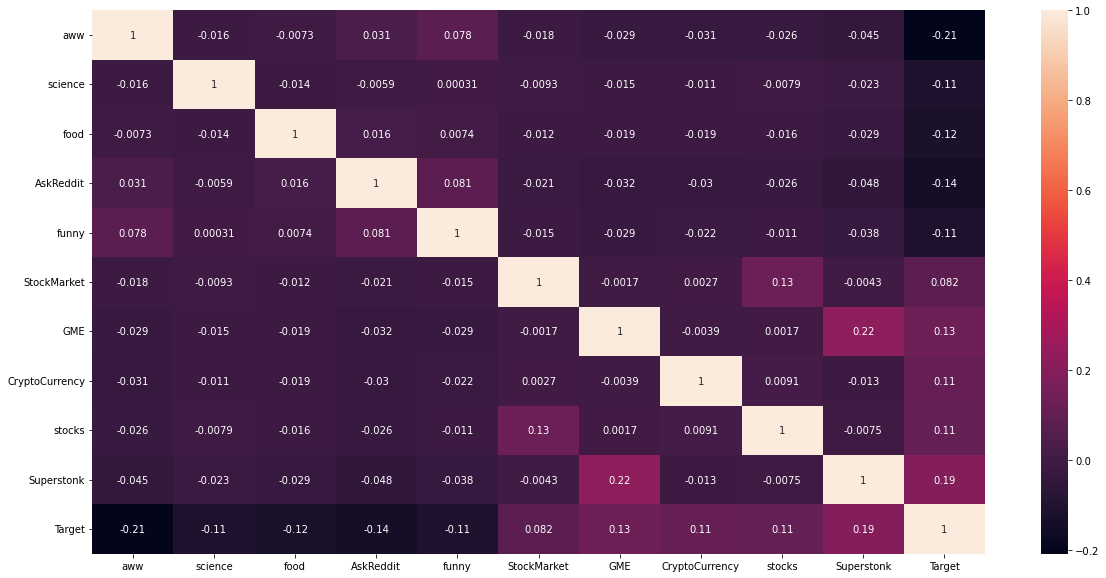

In [96]:
# Correlation heatmap of subreddits with largest differences in interactions between Target classes and 'Target'

mask = list(x.index) + ['Target']
plt.figure(figsize=(20,10))
sns.heatmap(df_2[mask].corr(), annot=True)

## Scores

In [98]:
# Columns with the highest total scores where Target == 1

df_na_3[df_na_3.Target == 1].drop(columns=['Target']).sum().sort_values(ascending=False).head(10)

Superstonk        33903.426083
amcstock          12082.910694
AskReddit          7677.664027
CryptoCurrency     7521.769176
GME                7149.887949
stocks             4715.293481
dogecoin           4213.386306
antiwork           3009.515711
memes              2622.193290
Shortsqueeze       2594.546146
dtype: float64

In [99]:
# Defining a list of the columns with the highest total scores where Target == 1

high_sco_1 = df_na_3[df_na_3.Target == 1].drop(columns=['Target']).sum().sort_values(ascending=False).head(10).index

In [100]:
high_sco_1

Index(['Superstonk', 'amcstock', 'AskReddit', 'CryptoCurrency', 'GME',
       'stocks', 'dogecoin', 'antiwork', 'memes', 'Shortsqueeze'],
      dtype='object')

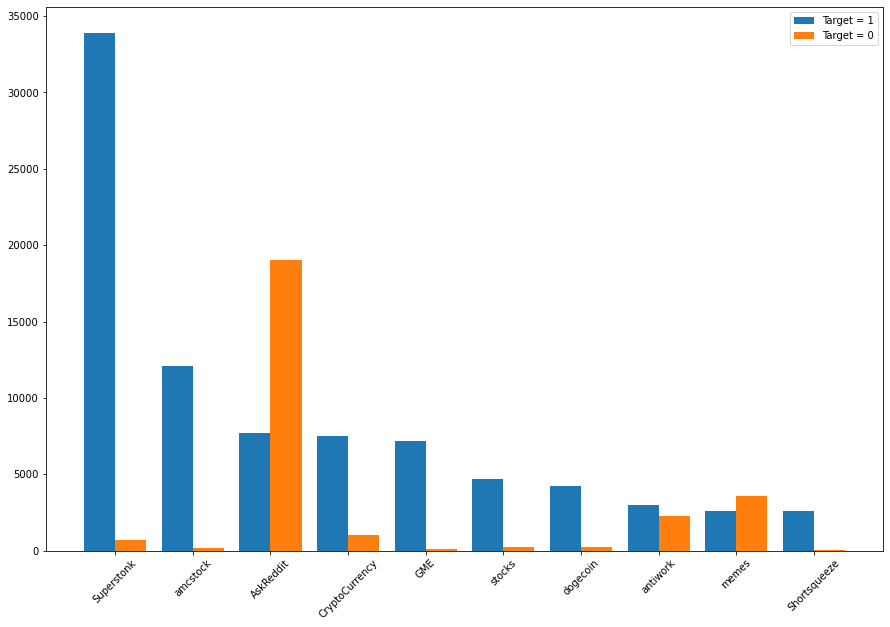

In [101]:
# Bar chart of the columns with the highest total scores for Target class 1 
# as compared to total scores of same columns for Target class 0

a = df_na_3[df_na_3.Target == 1].drop(columns=['Target']).sum().sort_values(ascending=False).head(10)
b = df_na_3[df_na_3.Target == 0].drop(columns=['Target']).sum()[high_sco_1]

plt.figure(figsize=(15,10))

x_axis = np.arange(10)

plt.bar(x_axis - 0.2, a.values, 0.4, label = 'Target = 1')
plt.bar(x_axis + 0.2, b.values, 0.4, label = 'Target = 0')

plt.xticks(x_axis, a.index)
plt.xticks(rotation=45)

# plt.xlabel("Subreddits")
# plt.ylabel("Number of Users/Contributors")
# plt.title("Most populated columns for Target = 1")

plt.legend()
plt.show()

<AxesSubplot:>

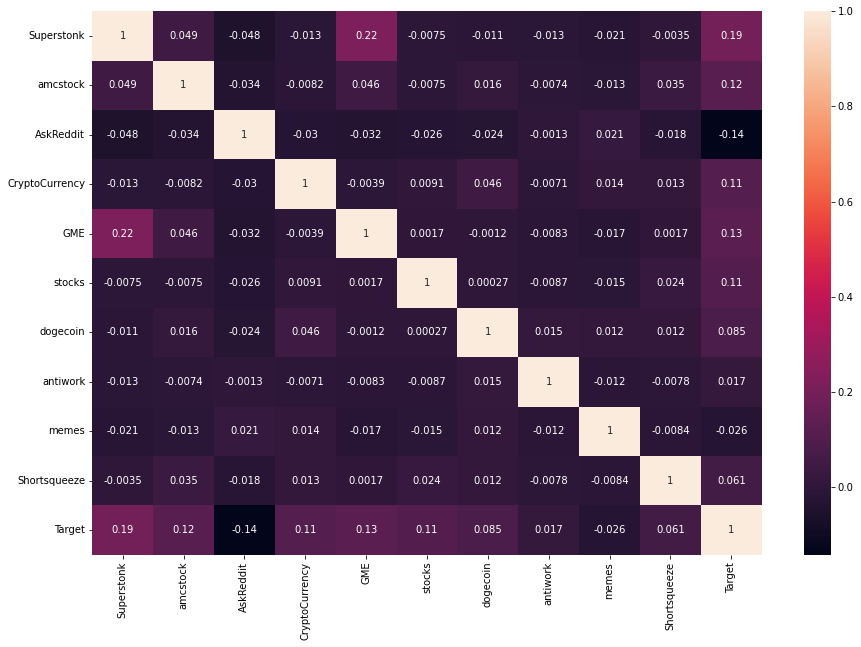

In [102]:
# Heatmap of correlations between columns with highest total scores for Target class 1 and 'Target'

plt.figure(figsize=(15,10))
sns.heatmap(df_2[list(high_sco_1) + ['Target']].corr(), annot=True)

In [103]:
# Columns with the highest total scores where Target == 0

df_na_3[df_na_3.Target == 0].drop(columns=['Target']).sum().sort_values(ascending=False).head(10)

AskReddit    19055.441225
aww          12509.608703
food          5552.073082
pics          3962.112817
memes         3561.041252
funny         3536.018838
science       3506.427616
cats          3043.570620
gaming        2566.777832
teenagers     2532.915351
dtype: float64

In [104]:
# Defining a list of columns with the highest total scores where Target == 0

high_sco_0 = df_na_3[df_na_3.Target == 0].drop(columns=['Target']).sum().sort_values(ascending=False).head(10).index

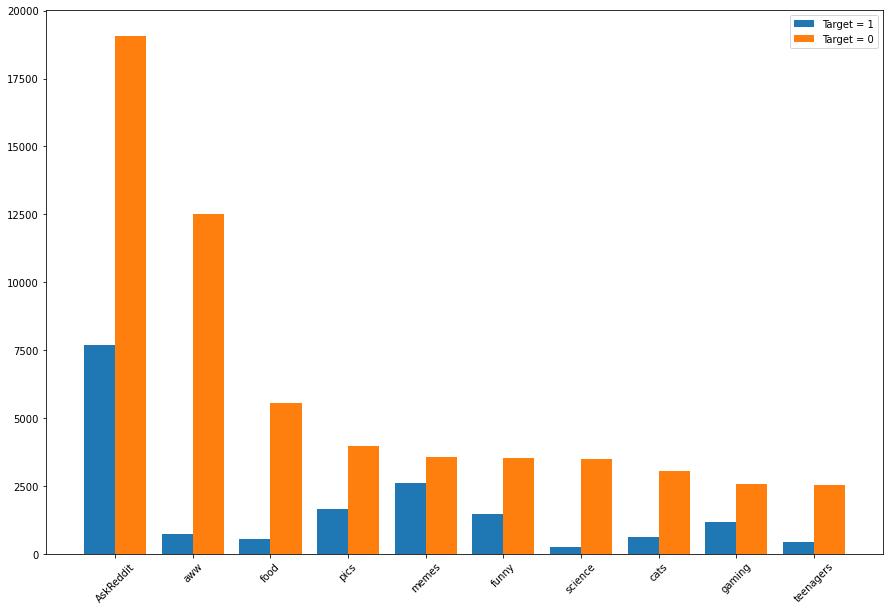

In [105]:
# Bar chart of the columns with the highest total scores for Target class 0 
# as compared to total scores of same columns for Target class 1

a = df_na_3[df_na_3.Target == 0].drop(columns=['Target']).sum().sort_values(ascending=False).head(10)
b = df_na_3[df_na_3.Target == 1].drop(columns=['Target']).sum()[high_sco_0]

plt.figure(figsize=(15,10))

x_axis = np.arange(10)

plt.bar(x_axis - 0.2, b.values, 0.4, label = 'Target = 1')
plt.bar(x_axis + 0.2, a.values, 0.4, label = 'Target = 0')

plt.xticks(x_axis, a.index)
plt.xticks(rotation=45)

# plt.xlabel("Subreddits")
# plt.ylabel("Number of Users/Contributors")
# plt.title("Most populated columns for Target = 1")

plt.legend()
plt.show()

<AxesSubplot:>

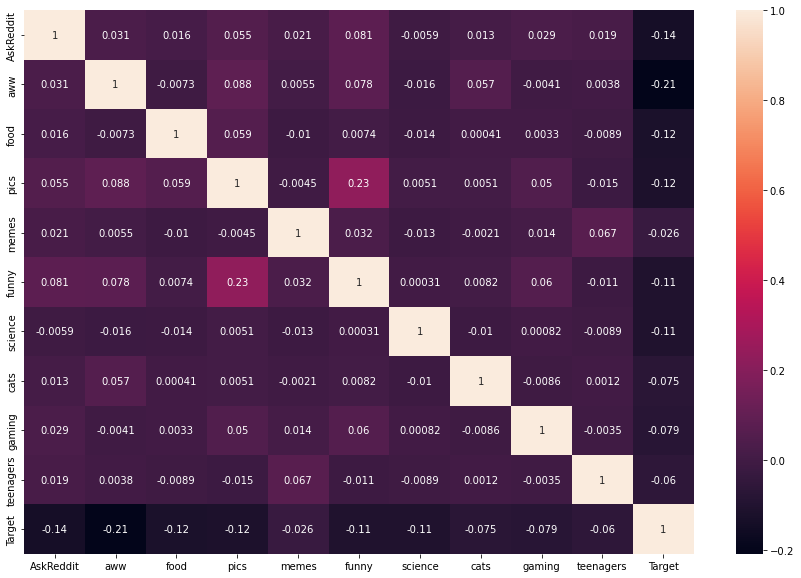

In [106]:
# Heatmap of correlations between columns with highest total scores for Target class 0 and 'Target'

plt.figure(figsize=(15,10))
sns.heatmap(df_2[list(high_sco_0) + ['Target']].corr(), annot=True)

In [237]:
# Examining the differences in the total scores of subreddits between Target classes

a = df_na_3[df_na_3.Target == 1].drop(columns=['Target']).sum()
b = df_na_3[df_na_3.Target == 0].drop(columns=['Target']).sum()

(a-b).sort_values()

aww              -11770.136384
AskReddit        -11377.777198
food              -5009.768191
science           -3254.752996
cats              -2432.897524
                      ...     
stocks             4455.750552
CryptoCurrency     6530.307916
GME                7025.517910
amcstock          11912.225164
Superstonk        33222.121969
Length: 11075, dtype: float64

In [238]:
# Looking at the summary statistics of the differences

(a-b).describe()

count    11075.000000
mean         0.515882
std        402.331893
min     -11770.136384
25%         -8.532044
50%         -1.528199
75%          2.709509
max      33222.121969
dtype: float64

In [239]:
# Looking at the most positive and negative differences (largest absolute values)

pd.concat([(a-b).sort_values().head(), (a-b).sort_values().tail()])

aww              -11770.136384
AskReddit        -11377.777198
food              -5009.768191
science           -3254.752996
cats              -2432.897524
stocks             4455.750552
CryptoCurrency     6530.307916
GME                7025.517910
amcstock          11912.225164
Superstonk        33222.121969
dtype: float64

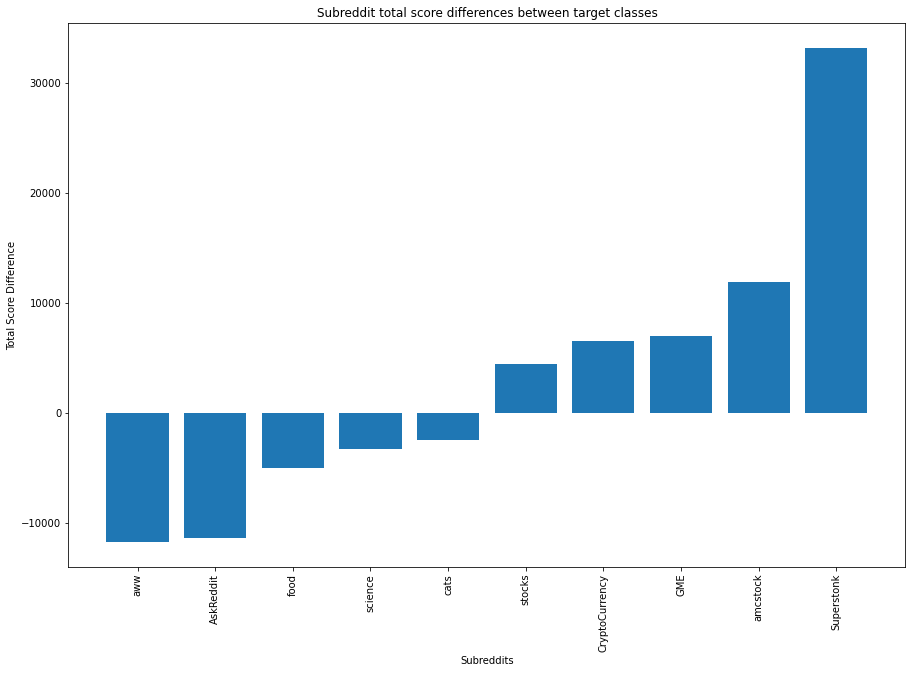

In [240]:
# Plotting a bar chat of the subreddits with the larget differences in total score between Target classes

x = pd.concat([(a-b).sort_values().head(), (a-b).sort_values().tail()])

plt.figure(figsize=(15,10))

x_axis = np.arange(len(x))

plt.bar(x.index, x.values)

plt.xticks(rotation=90)

plt.xlabel("Subreddits")
plt.ylabel("Total Score Difference")
plt.title("Subreddit total score differences between target classes")

plt.show()

<AxesSubplot:>

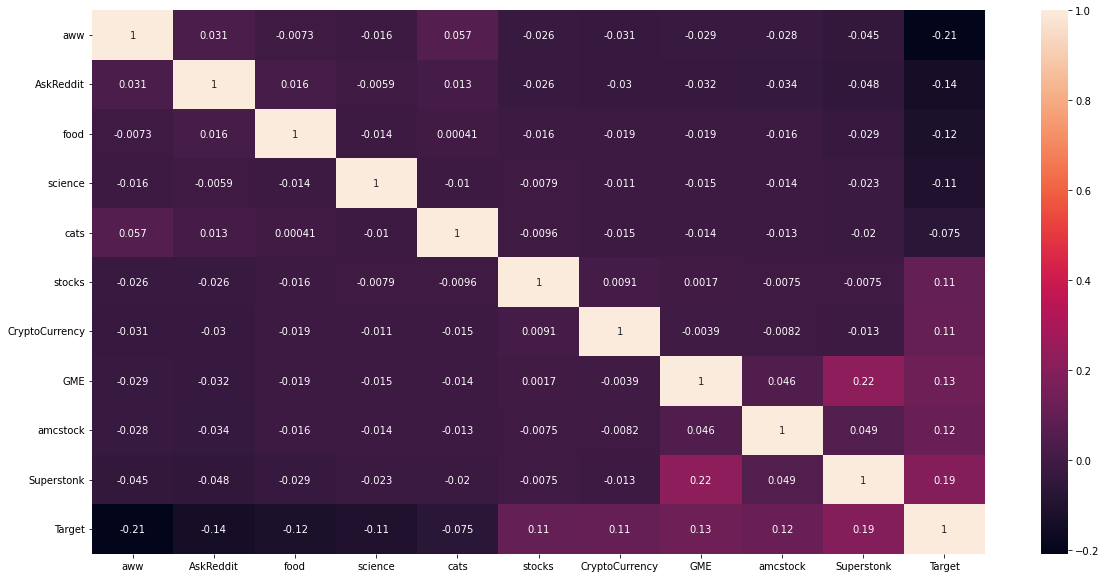

In [113]:
# Correlation heatmap of subreddits with largest differences in total score between Target classes and 'Target'

mask = list(x.index) + ['Target']
plt.figure(figsize=(20,10))
sns.heatmap(df_2[mask].corr(), annot=True)

# Columns of Particular Interest

Isolating subreddits that have both largest difference in interactions and the largest difference in score between Target classes

In [114]:
# Subreddits with the largest differences in interactions between Target classes

a = (3207 - df_na_3[df_na_3.Target == 1].drop(columns=['Target']).isna().sum())
b = (2985 - df_na_3[df_na_3.Target == 0].drop(columns=['Target']).isna().sum())

popular = pd.concat([(a-b).sort_values().head(), (a-b).sort_values().tail()]).index

In [115]:
# Subreddits with the largest differences in total score between Target classes

a = df_na_3[df_na_3.Target == 1].drop(columns=['Target']).sum()
b = df_na_3[df_na_3.Target == 0].drop(columns=['Target']).sum()

high_score = pd.concat([(a-b).sort_values().head(), (a-b).sort_values().tail()]).index

In [116]:
popular

Index(['aww', 'science', 'food', 'AskReddit', 'funny', 'StockMarket', 'GME',
       'CryptoCurrency', 'stocks', 'Superstonk'],
      dtype='object')

In [117]:
high_score

Index(['aww', 'AskReddit', 'food', 'science', 'cats', 'stocks',
       'CryptoCurrency', 'GME', 'amcstock', 'Superstonk'],
      dtype='object')

In [118]:
# Defining a list of subreddits that appear in both difference measures

note_cols = list(popular.intersection(high_score))

<AxesSubplot:>

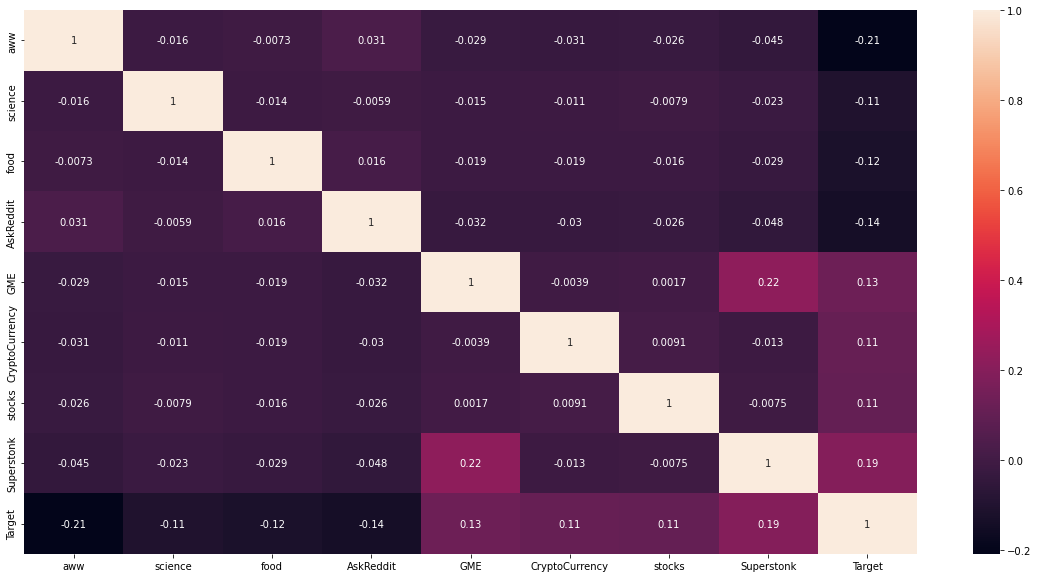

In [119]:
# Heatmap of correlations between subreddits that appear in both difference measures and 'Target'

plt.figure(figsize=(20,10))
sns.heatmap(df_2[note_cols + ['Target']].corr(), annot=True)

In [123]:
# Replacing NaNs with 0s and making a copy 

df_2 = df_na_3.replace(np.nan, 0).copy()

In [125]:
# Saving cleaned dataset as a CSV

df_2.to_csv('df_2.csv')

# Feature Selection

In [ ]:
# Creating an initial subset of features to use in our classification models

In [133]:
# 1000 most populated columns across entire dataframe

df_na_3.isna().sum().sort_values()[1:].head(1000)

AskReddit            3231
aww                  3982
pics                 4480
funny                4552
interestingasfuck    4868
                     ... 
Anticonsumption      6166
SuccessionTV         6166
gamernews            6166
tippytaps            6166
ClashRoyale          6166
Length: 1000, dtype: int64

In [149]:
subs_1 = df_na_3.isna().sum().sort_values()[1:].head(1000).index

In [134]:
df_na_3[df_na_3.Target == 1].shape, df_na_3[df_na_3.Target == 0].shape

((3207, 11076), (2985, 11076))

In [138]:
# 1000 columns with largest population differences between target classes

a = (3207 - df_na_3[df_na_3.Target == 1].drop(columns=['Target']).isna().sum())
b = (2985 - df_na_3[df_na_3.Target == 0].drop(columns=['Target']).isna().sum())

In [143]:
pd.concat([(a-b).sort_values().head(500), (a-b).sort_values().tail(500)])

aww              -1682
science           -738
food              -725
AskReddit         -603
funny             -550
                  ... 
StockMarket        392
GME                444
CryptoCurrency     543
stocks             720
Superstonk         774
Length: 1000, dtype: int64

In [153]:
subs_2 = pd.concat([(a-b).sort_values().head(500), (a-b).sort_values().tail(500)]).index

In [140]:
# 1000 columns with largest score differences between target classes

c = df_na_3[df_na_3.Target == 1].drop(columns=['Target']).sum()
d = df_na_3[df_na_3.Target == 0].drop(columns=['Target']).sum()

In [144]:
pd.concat([(c-d).sort_values().head(500), (c-d).sort_values().tail(500)])

aww              -11770.136384
AskReddit        -11377.777198
food              -5009.768191
science           -3254.752996
cats              -2432.897524
                      ...     
stocks             4455.750552
CryptoCurrency     6530.307916
GME                7025.517910
amcstock          11912.225164
Superstonk        33222.121969
Length: 1000, dtype: float64

In [155]:
subs_3 = pd.concat([(c-d).sort_values().head(500), (c-d).sort_values().tail(500)]).index

In [159]:
# Extracting the columns that lie at the intersection of all 3 criteria

select_feat = list(subs_1.intersection(subs_2).intersection(subs_3))

In [160]:
# Number of features in initial subset

len(select_feat)

398

In [167]:
'Target' in select_feat

False

In [161]:
# Features in initial subset

select_feat

['AskReddit',
 'aww',
 'pics',
 'funny',
 'interestingasfuck',
 'news',
 'antiwork',
 'gaming',
 'science',
 'worldnews',
 'nextfuckinglevel',
 'Showerthoughts',
 'facepalm',
 'Damnthatsinteresting',
 'mildlyinteresting',
 'todayilearned',
 'MadeMeSmile',
 'food',
 'politics',
 'Superstonk',
 'memes',
 'PublicFreakout',
 'Unexpected',
 'stocks',
 'CryptoCurrency',
 'technology',
 'mildlyinfuriating',
 'movies',
 'HolUp',
 'IdiotsInCars',
 'oddlyterrifying',
 'OldSchoolCool',
 'LifeProTips',
 'WhitePeopleTwitter',
 'unpopularopinion',
 'Music',
 'videos',
 'cats',
 'nottheonion',
 'NoStupidQuestions',
 'Cringetopia',
 'GME',
 'oddlysatisfying',
 'Tinder',
 'explainlikeimfive',
 'AskMen',
 'WTF',
 'personalfinance',
 'investing',
 'TooAfraidToAsk',
 'StockMarket',
 'gifs',
 'options',
 'entertainment',
 'dankmemes',
 'tifu',
 'amcstock',
 'dogecoin',
 'TrueOffMyChest',
 'teenagers',
 'Bitcoin',
 'television',
 'Futurology',
 'therewasanattempt',
 'space',
 'Jokes',
 'NatureIsFuckingLit',

In [ ]:
# Creating a second narrower subset of features to use in our classification models

In [172]:
df_2[select_feat + ['Target']].corr()['Target'][
    (df_2[select_feat + ['Target']].corr()['Target'] > 0.1) | (df_2[select_feat + ['Target']].corr()['Target'] < -0.1)
]

AskReddit           -0.141819
aww                 -0.208098
pics                -0.115068
funny               -0.108371
science             -0.106552
MadeMeSmile         -0.104018
food                -0.120380
Superstonk           0.194768
stocks               0.106742
CryptoCurrency       0.112370
GME                  0.128608
investing            0.105472
amcstock             0.121558
AnimalsBeingDerps   -0.115541
Target               1.000000
Name: Target, dtype: float64

In [189]:
# Extracting columns from initial subset that have a correlation > 0.1 or < -0.1 with the Target column

super_select_feat = list(df_2[select_feat + ['Target']].corr()['Target'][
    (df_2[select_feat + ['Target']].corr()['Target'] > 0.1) | (df_2[select_feat + ['Target']].corr()['Target'] < -0.1)
].index)

In [190]:
len(super_select_feat)

15

In [191]:
'Target' in super_select_feat

True

In [192]:
super_select_feat.remove('Target')

In [194]:
# Number of features in second subset

len(super_select_feat)

14

In [195]:
# Features in second subset

super_select_feat

['AskReddit',
 'aww',
 'pics',
 'funny',
 'science',
 'MadeMeSmile',
 'food',
 'Superstonk',
 'stocks',
 'CryptoCurrency',
 'GME',
 'investing',
 'amcstock',
 'AnimalsBeingDerps']

In [198]:
# Converting initial and second subsets into dataframes

select_feat_df = pd.DataFrame(select_feat, columns=['feature'])
super_select_feat_df = pd.DataFrame(super_select_feat, columns=['feature'])

In [203]:
select_feat_df

,feature
0,AskReddit
1,aww
2,pics
3,funny
4,interestingasfuck
...,...
393,Nio
394,algotrading
395,AreTheStraightsOK
396,supersecretyachtclub


In [204]:
super_select_feat_df

,feature
0,AskReddit
1,aww
2,pics
3,funny
4,science
5,MadeMeSmile
6,food
7,Superstonk
8,stocks
9,CryptoCurrency


In [199]:
# Saving initial and second subsets as CSVs

select_feat_df.to_csv('select_feat.csv')
super_select_feat_df.to_csv('super_select_feat.csv')

<AxesSubplot:>

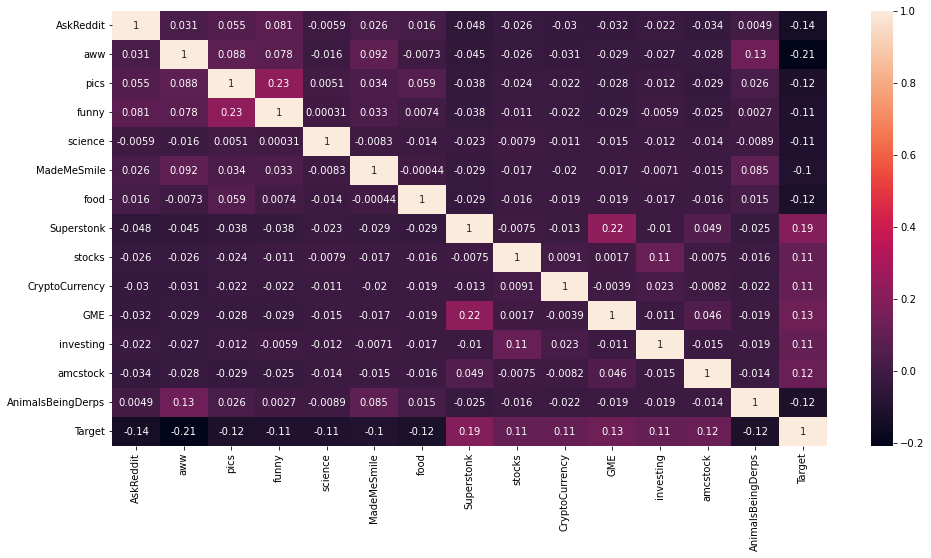

In [219]:
# Correlation heatmap of second subset features and Target column

plt.figure(figsize=(16,8))
sns.heatmap(df_2[super_select_feat + ['Target']].corr(), annot=True)